The goal of this analysis is to better understand the demographic makeup of Citibike riders, and to consider how basic demographic traits influnce Citibike usage behavior. I will focus my analysis on the age and gender of riders, and consider ride volume as well as average trip duration. From there, I will introduce basic weather data to consider how weather trends impact these metrics across demographic segments.  

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



rides = pd.read_csv('output3.csv')
weather = pd.read_csv('Weather.csv')
rides = rides[['Date', 'Duration', 'Birth Year', 'Gender']]
weather = weather.rename(columns={"DATE": "Date"})
weather = weather.drop(columns = ['Station'])
weather.head(3)


,Date,Average Wind Speed,Precipitation,Snowfall,Max Temperature
0,1/1/18,17.00,0.0,0.0,19
1,1/2/18,13.87,0.0,0.0,26
2,1/3/18,6.93,0.0,0.0,30


In [134]:
rides.head(3)

,Date,Duration,Birth Year,Gender
0,1/2/18,732,1969,1
1,1/3/18,520,1960,1
2,1/2/18,324,1947,1


In [135]:
# adding column so I can define temperature buckets to make analysis more straightforward!

#NOTE: This was a total pain! But once I got clued in to listmap, all was well :)

def temp(Max):

  if Max < 34:
    return '0_Freezing'
  elif Max < 50:
      return '1_Cold'
  elif Max < 65:
     return '2_Mild'
  elif Max < 85:
     return '3_Warm'
  else: 
     return '4_Hot'

    
weather['Temp Bucket'] = list(map(temp, weather['Max Temperature'])) 

weather[['Temp Bucket','Max Temperature']].groupby('Temp Bucket').count()

,Max Temperature
Temp Bucket,
0_Freezing,14
1_Cold,94
2_Mild,79
3_Warm,113
4_Hot,65


In [136]:
#Now that I know how to do this, adding yet another summary column of type str so I can try and glean some real insights.

def precip(inches):

  if inches == 0:
    return '0_Dry'
  elif inches < .5:
      return '1_Drizzle'
  elif inches < 1:
     return '2_Rain'
  elif inches < 2:
     return '3_Pouring'
  else: 
     return '4_Monsoon'

    
weather['Wetness'] = list(map(precip, weather['Precipitation'])) 

weather[['Wetness','Precipitation']].groupby('Wetness').count()

,Precipitation
Wetness,
0_Dry,215
1_Drizzle,101
2_Rain,32
3_Pouring,16
4_Monsoon,1


In [137]:
ride_weather = rides.join(weather.set_index('Date'), on='Date')

# adding column so I can define my age buckets by decade of birth year!
ride_weather['Decade'] = ride_weather['Birth Year'].apply(lambda x: int(x / 10) * 10) 

ride_weather['Gender'] = ride_weather['Gender'].astype(str)

ride_weather.dtypes

Date                   object
Duration                int64
Birth Year              int64
Gender                 object
Average Wind Speed    float64
Precipitation         float64
Snowfall              float64
Max Temperature         int64
Temp Bucket            object
Wetness                object
Decade                  int64
dtype: object

In [138]:
#Section 0 - Some initial data cleaning & basic analysis

#Let's de-codify the gender data so we can be sure they are clear, and then set them as strings

ride_weather['Gender'] = np.where(ride_weather['Gender'] == '1', 'male', ride_weather['Gender'])
ride_weather['Gender'] = np.where(ride_weather['Gender'] == '2', 'female', ride_weather['Gender'])


genderIndex = ride_weather[ ride_weather['Gender'] == '0' ].index
ride_weather = ride_weather.drop(genderIndex, axis=0)

ride_weather.tail(20)

,Date,Duration,Birth Year,Gender,Average Wind Speed,Precipitation,Snowfall,Max Temperature,Temp Bucket,Wetness,Decade
1048551,8/16/18,1393,1982,female,8.28,0.0,0.0,93,4_Hot,0_Dry,1980
1048552,8/16/18,285,1995,female,8.28,0.0,0.0,93,4_Hot,0_Dry,1990
1048555,8/16/18,560,1981,female,8.28,0.0,0.0,93,4_Hot,0_Dry,1980
1048556,8/16/18,238,1975,male,8.28,0.0,0.0,93,4_Hot,0_Dry,1970
1048557,8/16/18,89,1989,female,8.28,0.0,0.0,93,4_Hot,0_Dry,1980
1048559,8/16/18,4451,1961,female,8.28,0.0,0.0,93,4_Hot,0_Dry,1960
1048560,8/16/18,537,1981,male,8.28,0.0,0.0,93,4_Hot,0_Dry,1980
1048562,8/16/18,826,1984,male,8.28,0.0,0.0,93,4_Hot,0_Dry,1980
1048563,8/16/18,434,1989,female,8.28,0.0,0.0,93,4_Hot,0_Dry,1980
1048564,8/16/18,2542,1962,male,8.28,0.0,0.0,93,4_Hot,0_Dry,1960


In [139]:
ridesPerGender = pd.DataFrame(ride_weather[['Gender', 'Duration']].groupby('Gender').count()) #simply using duration as a placeholder for count!

ridesPerGender = ridesPerGender.rename(columns={"Duration": "Count"}) # fixing this column name for clarity.

ride_weather.head(3)

,Date,Duration,Birth Year,Gender,Average Wind Speed,Precipitation,Snowfall,Max Temperature,Temp Bucket,Wetness,Decade
0,1/2/18,732,1969,male,13.87,0.0,0.0,26,0_Freezing,0_Dry,1960
1,1/3/18,520,1960,male,6.93,0.0,0.0,30,0_Freezing,0_Dry,1960
2,1/2/18,324,1947,male,13.87,0.0,0.0,26,0_Freezing,0_Dry,1940


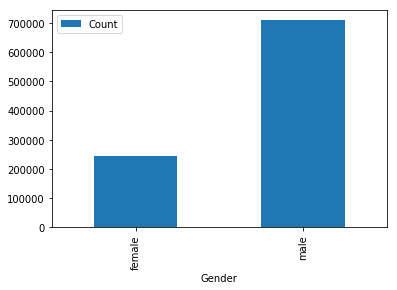

In [140]:
#Let's ~~~visualize~~~

ridesPerGender.plot(kind='bar')

#Woah! Way more Citibike rides are taken by males than females. 

In [141]:
#What happens if we look at ride duration?

ride_weather.groupby('Gender')['Duration'].agg(['mean', 'min', 'max'])

# We find out that Citibike a) has a minimum of 61 seconds per ride (???) and also doesn't remove data on rides that result in stolen bikes. 

,mean,min,max
Gender,,,
female,1026.653558,61,5090114
male,832.185940,61,3553060


In [142]:
# That more or less prevents me from taking any aggrigate data seriously, so I'm going to stick with median as my baseline measure

ride_weather.groupby('Gender')['Duration'].agg(['median'])

,median
Gender,
female,660
male,550


In [143]:
#And now some age analysis!
#First off, let's make sure we're working with integers for birth years. 

ride_weather['Birth Year'] = ride_weather['Birth Year'].astype(int)
rides.dtypes

Date          object
Duration       int64
Birth Year     int64
Gender         int64
dtype: object

In [144]:
#Now let's see what our distribution and range look like


ride_weather[['Birth Year', 'Duration']].groupby('Birth Year').count().shape


(99, 1)

In [145]:
#99 rows?? That's a lot of different birth years. How old are these riders???

ride_weather[['Birth Year', 'Duration']].groupby('Birth Year').count().sort_values('Birth Year', ascending = True).head(25)

,Duration
Birth Year,
1886,13
1887,2
1888,17
1889,2
1890,2
1893,1
1894,22
1895,17
1899,15


In [146]:
#Clearly there are some Citibike trolls who think it is funny to mess with my data! I'm going to go ahead and say 
#that anyone born after 1936 not riding a citi bike (seemed like an inflexion point)

ridesIndex = ride_weather[ ride_weather['Birth Year'] < 1937 ].index
ride_weather = ride_weather.drop(ridesIndex, axis=0)

ridesPerDec = ride_weather.rename(columns={"Duration": "Count"})


ridesPerDec[['Birth Year', 'Count']].groupby('Birth Year').count().sort_values('Birth Year', ascending = True).head(5)

,Count
Birth Year,
1937,138
1938,114
1939,80
1940,276
1941,418


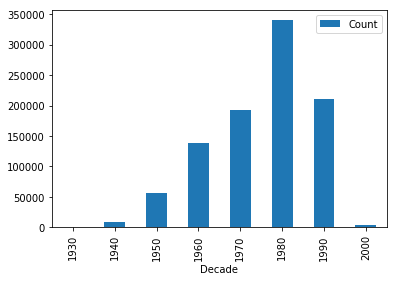

In [147]:
#So what does our age distribution look like?

ridesPerDec[['Decade', 'Count']].groupby('Decade').count().sort_values('Decade', ascending = True).plot(kind='bar')

In [148]:
ride_weather.head(3)

,Date,Duration,Birth Year,Gender,Average Wind Speed,Precipitation,Snowfall,Max Temperature,Temp Bucket,Wetness,Decade
0,1/2/18,732,1969,male,13.87,0.0,0.0,26,0_Freezing,0_Dry,1960
1,1/3/18,520,1960,male,6.93,0.0,0.0,30,0_Freezing,0_Dry,1960
2,1/2/18,324,1947,male,13.87,0.0,0.0,26,0_Freezing,0_Dry,1940


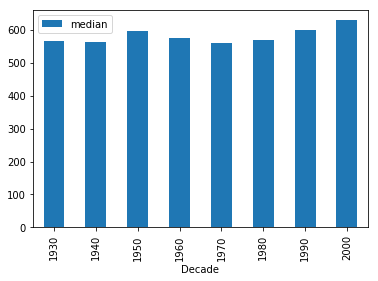

In [149]:
#Looking at median ride duration, it actually seems to be fairly uniform, with a slight uptick amongst Gen Z... 
#But all in all, your typical Citibike ride is goign to run around 10 minutes. Makes sense!

ride_weather[['Decade', 'Birth Year']]
age_ride_dur = ride_weather.groupby(['Decade']).agg(['median'])
age_ride_dur.plot(kind='bar', y='Duration')


Part 2 - Let's pull in some of our weather data. How will weather impact our demographic segments? Starting simple, let's just see what our data looks like for NYC in 2018, for both Max temperature and for precipitation. 

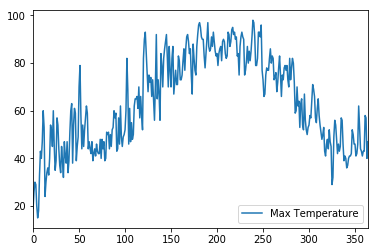

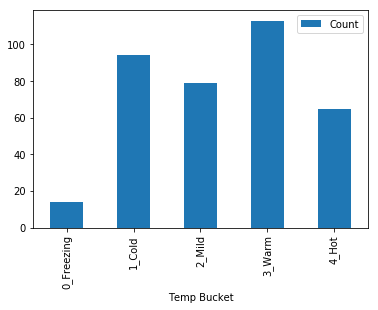

In [150]:
weather[['Date', 'Max Temperature']]
weather.plot(kind='line', y='Max Temperature')

weather_temp = weather.rename(columns={'Date':'Count'})
weather_temp[['Count', 'Temp Bucket']].groupby('Temp Bucket').count().sort_values('Temp Bucket').plot(kind='bar')

Text(0, 0.5, 'Days of the year')

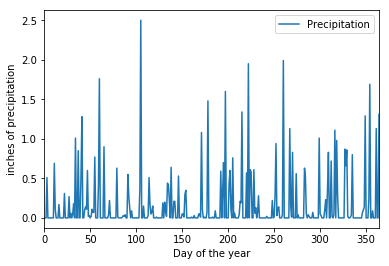

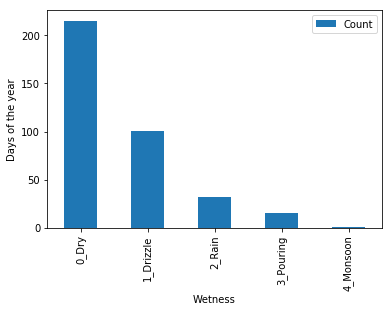

In [151]:
#What about precipitation?

weather[['Date', 'Precipitation']]
weather.plot(kind='line', y='Precipitation')

plt.ylabel('inches of precipitation')
plt.xlabel('Day of the year')

weather_temp = weather.rename(columns={'Date':'Count'})
weather_temp[['Count', 'Wetness']].groupby('Wetness').count().sort_values('Count', ascending = False).plot(kind='bar')

plt.ylabel('Days of the year')

In [152]:
#Unsurprisingly, temperature follows a general trend with the seasons, while precipitation is super volatile.
#On a summary basis, most days are dry, and very few have substantial precipitation, while temperature is well distributed.

#I'm going to start with temperature, to understand how much high and low temperatures impact ride volume and duration for male and female riders.

gender_rides = pd.crosstab(ride_weather['Temp Bucket'], ride_weather['Gender'])

gender_rides


Gender,female,male
Temp Bucket,,
0_Freezing,3143,11970
1_Cold,36180,124142
2_Mild,34634,110325
3_Warm,91623,253000
4_Hot,77128,209067


Text(0, 0.5, 'total rides')

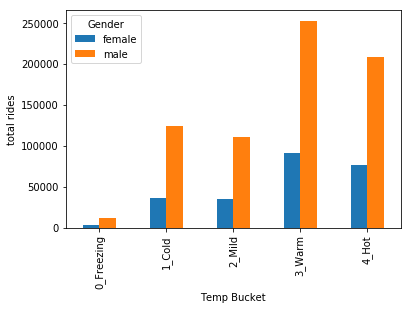

In [153]:
#How do our temperature buckets look when split between genders?

gender_rides.plot(kind = 'bar')

plt.ylabel('total rides')

Text(0, 0.5, '% rides taken by a female')

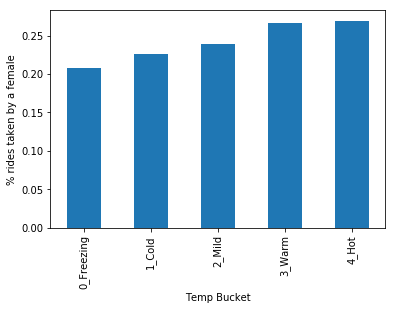

In [154]:
#That's cool, but not that helpful. Let's look at a ratio column to see what's going on. 


gender_rides['% female'] = (gender_rides['female'] / (gender_rides['female']+gender_rides['male']))

gender_rides['% female'].plot(kind = 'bar')

plt.ylabel('% rides taken by a female')

Text(0, 0.5, 'Rides taken')

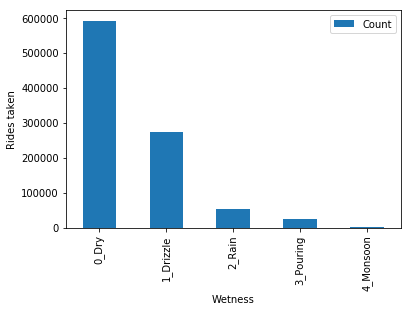

In [155]:
#That's kinda cool - seems like women are more down with the heat!

#Let's look into precipitation. How much do people care overall?

precip_rides = ride_weather.rename(columns={'Date':'Count'})
precip_rides[['Count', 'Wetness']].groupby('Wetness').count().sort_values('Count', ascending = False).plot(kind='bar')

plt.ylabel('Rides taken')

In [156]:
#By gender?

precip_rides = pd.crosstab(ride_weather['Wetness'], ride_weather['Gender'])

precip_rides

Gender,female,male
Wetness,,
0_Dry,152641,440237
1_Drizzle,69085,206638
2_Rain,13706,40576
3_Pouring,6698,19118
4_Monsoon,578,1935


Text(0, 0.5, 'Rides taken')

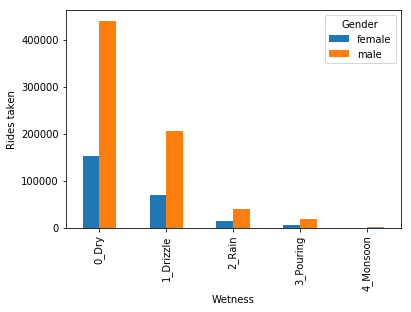

In [157]:
#And what does that look like?

precip_rides.plot(kind = 'bar')

plt.ylabel('Rides taken')

Text(0, 0.5, '% rides taken by a female')

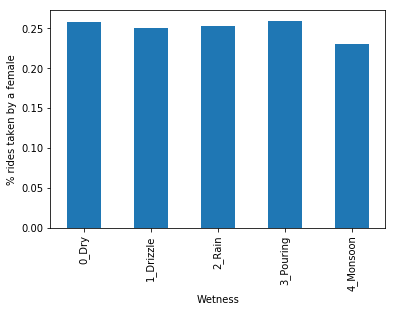

In [158]:
#But again, what does this mean as a trend?

precip_rides['% female'] = (precip_rides['female'] / (precip_rides['female']+precip_rides['male']))

precip_rides['% female'].plot(kind = 'bar')

plt.ylabel('% rides taken by a female')

This is kind of cool! It seems like the proportion holds regardless of the amount of precipitation. So while women appear to be more averse than men to colder weather, they are actually impacted equally by precipitation. Who knew!

Let's do the same analysis for birth decade!

In [159]:
#we've got way more columns here, so perhaps we should convert these to percents?
#Seems like the only way to do this is to create a new df and loop through our columns, applying a calculation to 
#overwrite each value with a row-ratio compared to the total

age_rides = pd.crosstab(ride_weather['Wetness'], ride_weather['Decade'])

age_rides

Decade,1930,1940,1950,1960,1970,1980,1990,2000
Wetness,,,,,,,,
0_Dry,191,5456,35590,86513,120183,211863,130696,2386
1_Drizzle,106,2614,16829,40477,56028,97904,60715,1050
2_Rain,18,476,3041,7425,10437,19646,12987,252
3_Pouring,16,230,1449,3541,4826,9431,6225,98
4_Monsoon,1,18,164,377,546,880,517,10


Text(0, 0.5, 'total rides')

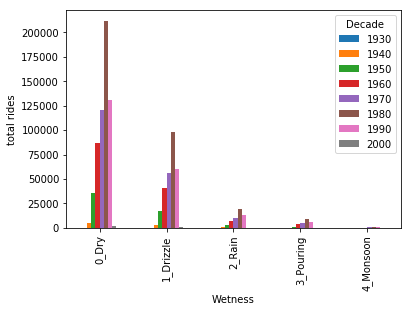

In [160]:
#What's this look like in aggregate?

age_rides.plot(kind = 'bar')

plt.ylabel('total rides')

In [161]:
#We need to do a bit more work to get this to where it needs to be. Let's just get the totals in there to start.

age_rides_ratios = age_rides.copy() 

age_rides['totals'] = age_rides.sum(axis=1)

age_rides
  

Decade,1930,1940,1950,1960,1970,1980,1990,2000,totals
Wetness,,,,,,,,,
0_Dry,191,5456,35590,86513,120183,211863,130696,2386,592878
1_Drizzle,106,2614,16829,40477,56028,97904,60715,1050,275723
2_Rain,18,476,3041,7425,10437,19646,12987,252,54282
3_Pouring,16,230,1449,3541,4826,9431,6225,98,25816
4_Monsoon,1,18,164,377,546,880,517,10,2513


In [162]:
#Now it gets funky. We'll need to loop through the above dataframe, and convert each column's valuies to percentages by row.

for i in age_rides_ratios.columns:
  age_rides_ratios[i] = (age_rides_ratios[i] / age_rides_ratios['totals'])*100
  
  
display(age_rides)
display(age_rides_ratios)

KeyError: ignored

In [0]:
#Great! Now let's ~~~visualize~~~

age_rides_ratios = age_rides_ratios.drop(['totals'], axis = 1)

age_rides_ratios.plot(kind = 'bar')#, legend = None)

In [0]:
#That's kinda fun - seems like baby boomers tend to prefew colder weather, and are more averse to warm and hot days,
#while Millenials and Gen Z folks mind the cold more, but can withstand the heat! 

#Let's see who hates rain the most!
#Again, we need to recreate a copy of the df, add a totals column, then loop through and replace values in each column
#with ratios rather than totals.

#wetness_rides['totals'] = wetness_rides.sum(axis=1)

wetness_rides = pd.crosstab(ride_weather['Wetness'], ride_weather['Decade'])

wetness_rides

In [0]:
wetness_rides['totals'] = wetness_rides.sum(axis=1)

wetness_rides

In [0]:
wetness_rides_ratios = wetness_rides.copy() 

for i in wetness_rides_ratios.columns:
   wetness_rides_ratios[i] = (wetness_rides_ratios[i] / wetness_rides_ratios['totals'])*100
    
display(wetness_rides)
display(wetness_rides_ratios)
  

In [0]:
#Great! Now let's ~~~visualize~~~ one last time

wetness_rides_ratios = wetness_rides_ratios.drop(['totals'], axis = 1)

wetness_rides_ratios.plot(kind = 'bar')#, legend = None)

SUMMARY


Clearly there is a lot here and many more ways to cut this - in particular I would like to dive deeper into the durations, and also consider wind speed. All that said, I think there were some interesting findings:

1. Citibike does not clear outliers from it's data, and should probably consider improving data validation for birth year. 
2. in 2018, Far more Citibike rides were attributed to males than to females
3. The sweet spot for Citibike riders is soundly with folks born in the 1980s. (29-39 year olds)
3. Women are more tolerant of warm weather than men, but less tolerant of cold weather
4. Manipulating dataframes is cool, but really hard!

Thanks :)
